In [77]:
# 1. Project Setup
import sys, os
sys.path.append(os.path.abspath("../src"))

from preprocessing import load_and_prepare_data, split_and_scale, select_top_features
from resampling import (
    manual_upsampling, smote, adasyn, borderline_smote,
    smote_tomek, smote_enn, random_undersample, cluster_centroids
)
from models import make_model
from evaluation import evaluate_model

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [79]:
# 2. Load and Preprocess Data
path = "../data/synth_rare_event_data.csv"
target_col = "rare_event"

X, y = load_and_prepare_data(path, target_col)
X_train_scaled, X_test_scaled, y_train, y_test = split_and_scale(X, y)
X_train, X_test, top_features = select_top_features(X_train_scaled, y_train, X_test_scaled, return_features=True)



--- Manual Upsampling ---
              precision    recall  f1-score   support

           0       0.99      0.59      0.74       982
           1       0.03      0.61      0.05        18

    accuracy                           0.59      1000
   macro avg       0.51      0.60      0.39      1000
weighted avg       0.97      0.59      0.72      1000

ROC AUC: 0.653
PR AUC: 0.035


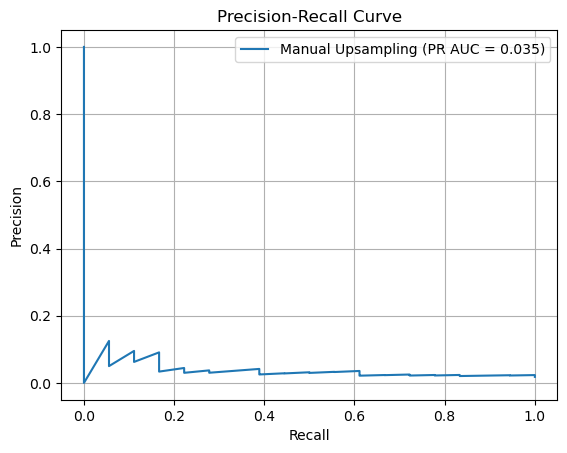

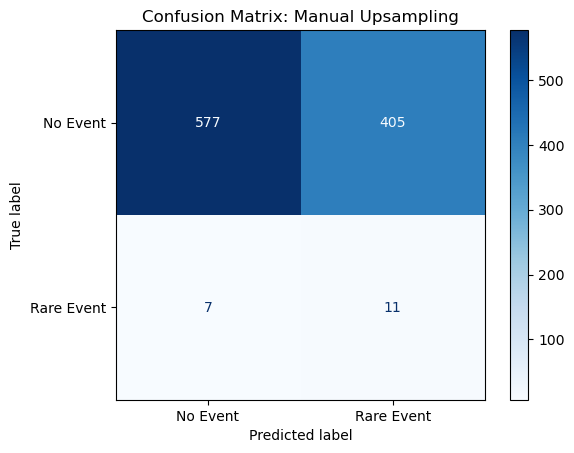


--- SMOTE ---
              precision    recall  f1-score   support

           0       0.99      0.59      0.74       982
           1       0.03      0.61      0.05        18

    accuracy                           0.59      1000
   macro avg       0.51      0.60      0.39      1000
weighted avg       0.97      0.59      0.73      1000

ROC AUC: 0.632
PR AUC: 0.029


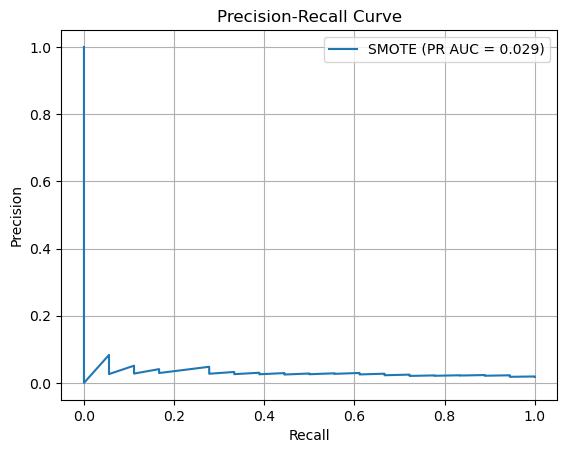

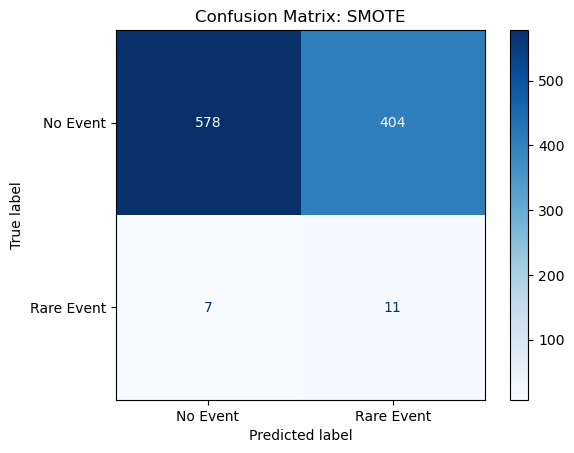


--- ADASYN ---
              precision    recall  f1-score   support

           0       0.98      0.58      0.73       982
           1       0.02      0.50      0.04        18

    accuracy                           0.58      1000
   macro avg       0.50      0.54      0.39      1000
weighted avg       0.97      0.58      0.72      1000

ROC AUC: 0.617
PR AUC: 0.03


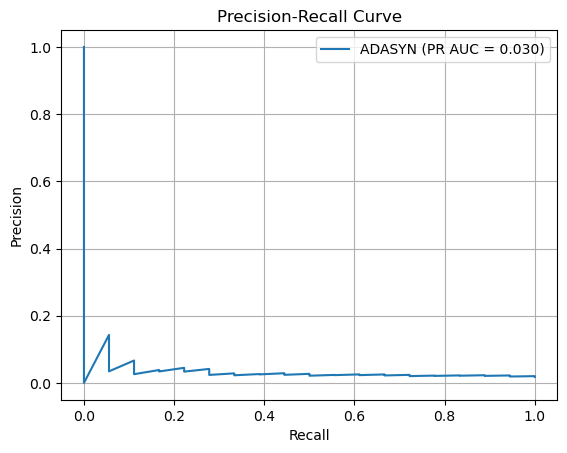

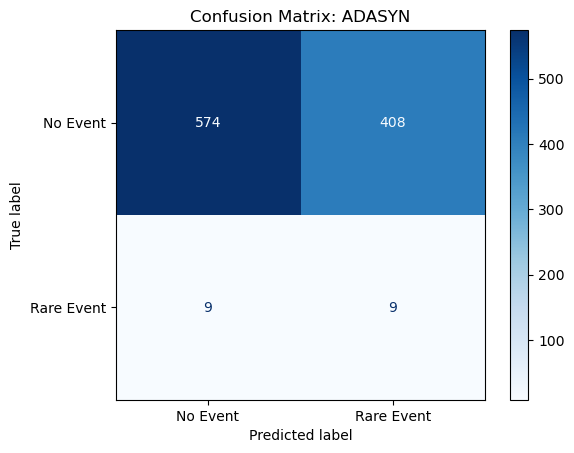


--- Borderline SMOTE ---
              precision    recall  f1-score   support

           0       0.99      0.68      0.80       982
           1       0.02      0.44      0.05        18

    accuracy                           0.67      1000
   macro avg       0.50      0.56      0.42      1000
weighted avg       0.97      0.67      0.79      1000

ROC AUC: 0.579
PR AUC: 0.026


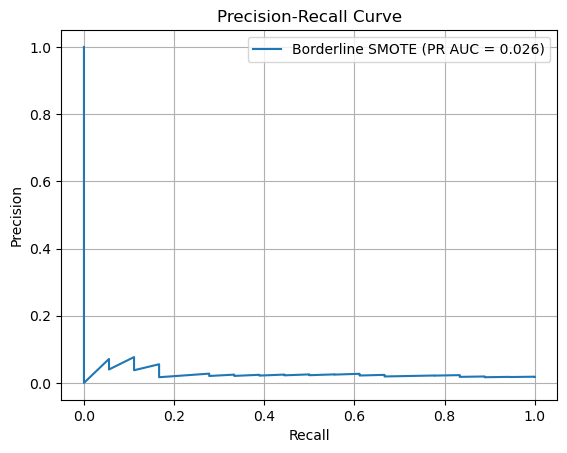

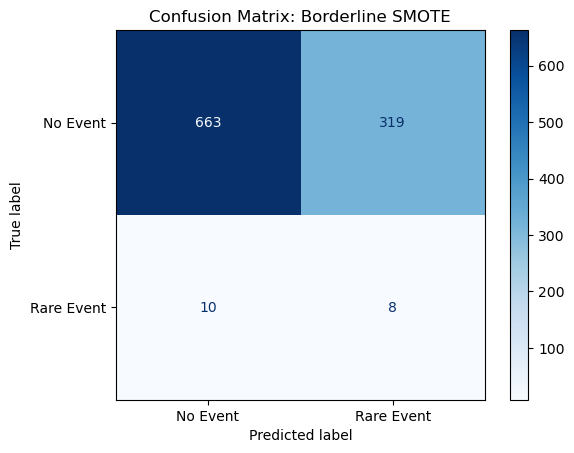


--- SMOTETomek ---
              precision    recall  f1-score   support

           0       0.99      0.59      0.74       982
           1       0.03      0.61      0.05        18

    accuracy                           0.59      1000
   macro avg       0.51      0.60      0.39      1000
weighted avg       0.97      0.59      0.73      1000

ROC AUC: 0.632
PR AUC: 0.029


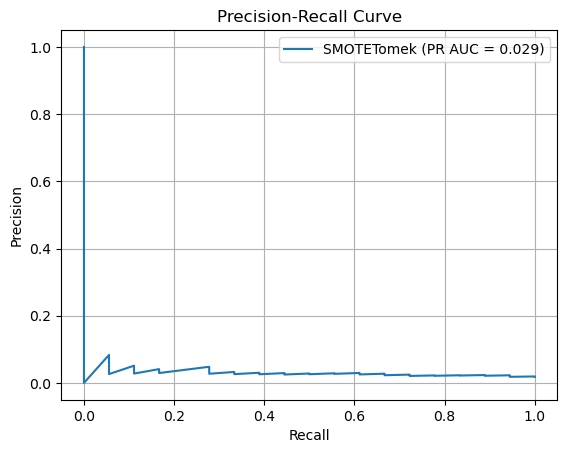

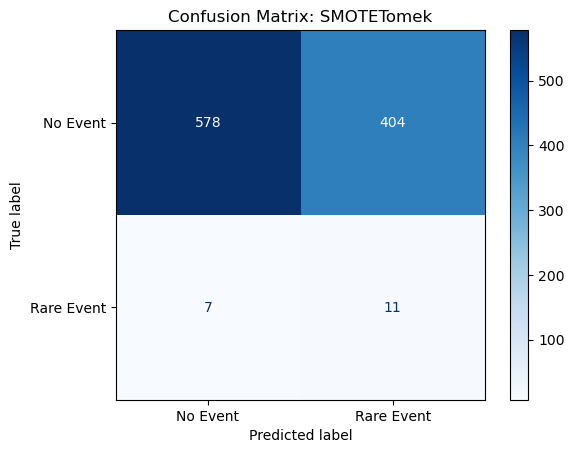


--- SMOTEENN ---
              precision    recall  f1-score   support

           0       0.99      0.57      0.73       982
           1       0.03      0.67      0.05        18

    accuracy                           0.57      1000
   macro avg       0.51      0.62      0.39      1000
weighted avg       0.97      0.57      0.71      1000

ROC AUC: 0.619
PR AUC: 0.027


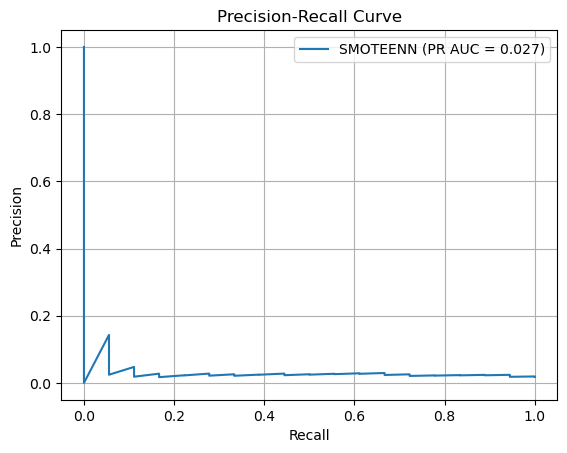

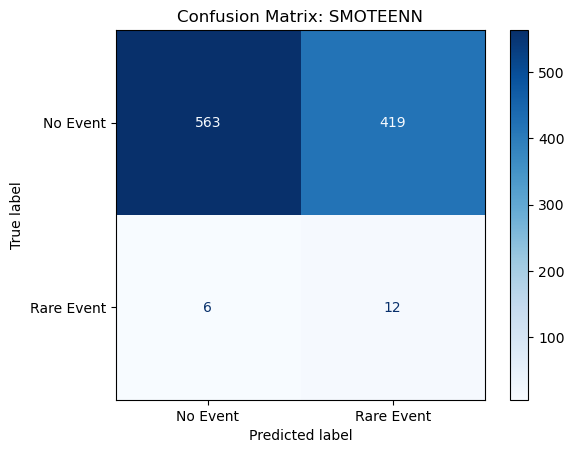


--- Random Undersample ---
              precision    recall  f1-score   support

           0       0.98      0.53      0.69       982
           1       0.02      0.56      0.04        18

    accuracy                           0.54      1000
   macro avg       0.50      0.55      0.37      1000
weighted avg       0.97      0.54      0.68      1000

ROC AUC: 0.606
PR AUC: 0.032


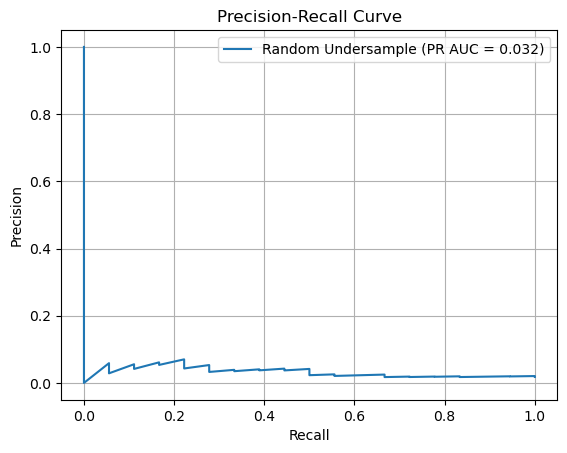

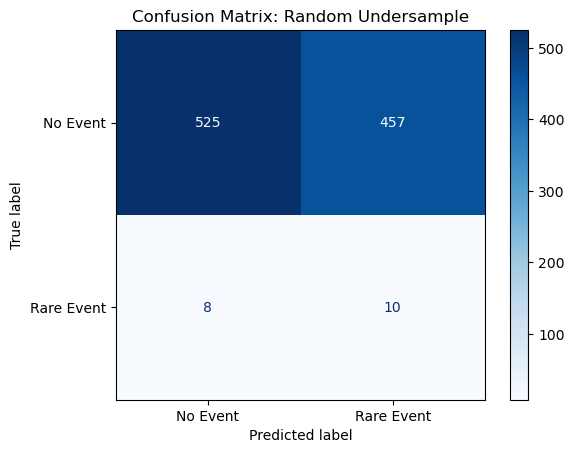


--- Cluster Centroids ---
              precision    recall  f1-score   support

           0       0.99      0.59      0.74       982
           1       0.02      0.56      0.05        18

    accuracy                           0.59      1000
   macro avg       0.51      0.57      0.39      1000
weighted avg       0.97      0.59      0.73      1000

ROC AUC: 0.639
PR AUC: 0.043


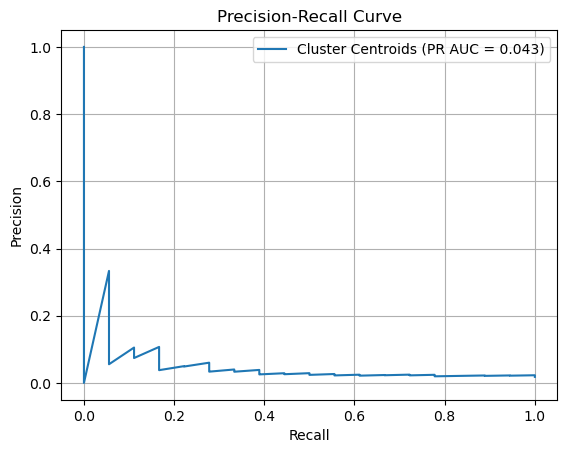

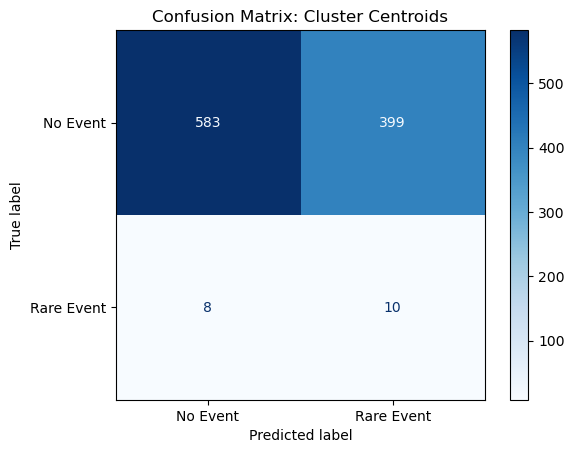


--- No Resampling ---
              precision    recall  f1-score   support

           0       0.99      0.62      0.76       982
           1       0.02      0.50      0.04        18

    accuracy                           0.62      1000
   macro avg       0.50      0.56      0.40      1000
weighted avg       0.97      0.62      0.75      1000

ROC AUC: 0.598
PR AUC: 0.032


/Users/sophiaboettcher/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


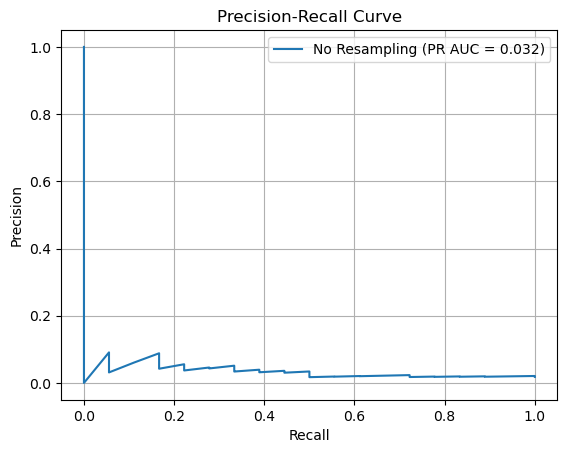

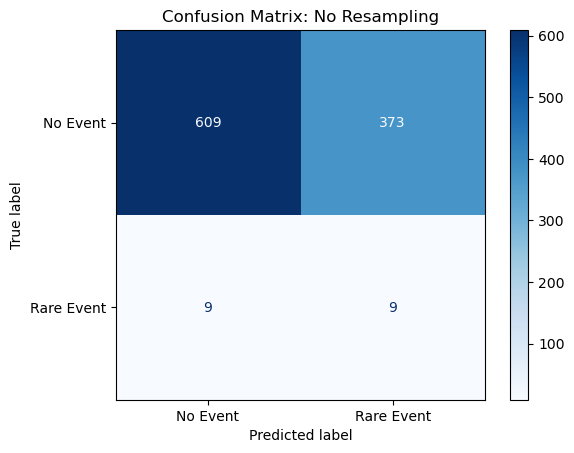

In [85]:
# 3. Define Resampling Methods
results = []

resamplers = {
    "Manual Upsampling": lambda: manual_upsampling(X_train, y_train, target_col),
    "SMOTE": lambda: smote(X_train, y_train),
    "ADASYN": lambda: adasyn(X_train, y_train),
    "Borderline SMOTE": lambda: borderline_smote(X_train, y_train),
    "SMOTETomek": lambda: smote_tomek(X_train, y_train),
    "SMOTEENN": lambda: smote_enn(X_train, y_train),
    "Random Undersample": lambda: random_undersample(X_train, y_train),
    "Cluster Centroids": lambda: cluster_centroids(X_train, y_train),
    "No Resampling": lambda: (X_train, y_train),
}

for name, sampler in resamplers.items():
    X_res, y_res = sampler()
    model = make_model()
    model.fit(X_res, y_res)
    evaluate_model(model, X_test, y_test, results=results, label=name)


,Method,ROC AUC,PR AUC
7,Cluster Centroids,0.638549,0.042639
0,Manual Upsampling,0.653315,0.035408
8,No Resampling,0.597533,0.032336
6,Random Undersample,0.605906,0.031565
2,ADASYN,0.616655,0.029730
1,SMOTE,0.631987,0.028748
4,SMOTETomek,0.631987,0.028748
5,SMOTEENN,0.618805,0.027132
3,Borderline SMOTE,0.578977,0.026059


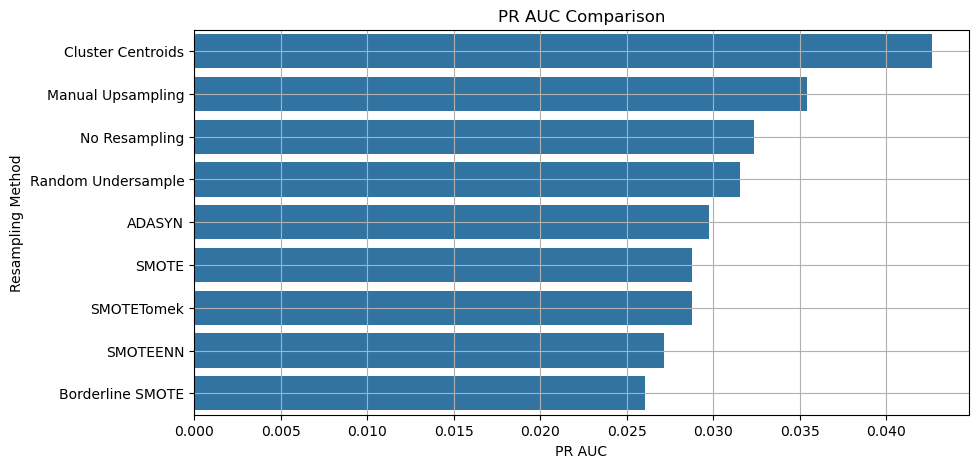

In [82]:
# 4. Compare All Results
results_df = pd.DataFrame(results)
display(results_df.sort_values(by="PR AUC", ascending=False))

plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.sort_values(by="PR AUC", ascending=False), x="PR AUC", y="Method")
plt.title("PR AUC Comparison")
plt.xlabel("PR AUC")
plt.ylabel("Resampling Method")
plt.grid(True)
plt.show()
